In [365]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import datetime
import pytz

# Load JSON data from file
with open('alerts-processed.json') as f:
    data = json.load(f)
    
# Flatten the filtered JSON data into a pandas dataframe
df = pd.json_normalize(data)

In [366]:
df.shape
#Shows 42737 rows / 16 columns

(42737, 16)

In [367]:
#Shows attributes
df.columns

Index(['pubMillis', 'roadType', 'street', 'city', 'country', 'reliability',
       'type', 'confidence', 'uuid', 'subtype', 'nThumbsUp', 'reportRating',
       'request_time', 'location.x', 'location.y', 'reportDescription'],
      dtype='object')

In [368]:
# Keep only relevant columns
df = df[['pubMillis',
         #'roadType',
         'street',
         #'city', 'country', 'reliability', 
         'type',
         #'confidence', 'uuid',
         'subtype',
         #'nThumbsUp', 'reportRating',
         #'request_time',
         'location.x', 'location.y', 
         #'reportDescription'
        ]].copy()

In [369]:
# rename the columns
df = df.rename(columns={'pubMillis': 'DateTime', 'street': 'Street', 'type': 'Type', 'subtype': 'Subtype', 'location.x': 'Lat', 'location.y': 'Long'})

# convert the DateTime column to datetime data type
df['DateTime'] = pd.to_datetime(df['DateTime'], unit='ms')

# localize datetime to UTC timezone
df['DateTime'] = df['DateTime'].dt.tz_localize('UTC')

# convert datetime to GMT+8:00 timezone
df['DateTime'] = df['DateTime'].dt.tz_convert(pytz.timezone('Asia/Singapore'))

#Set DateTime as Index
df = df.set_index('DateTime')

In [370]:
df.head()

,Street,Type,Subtype,Lat,Long
DateTime,,,,,
2017-07-14 17:49:13.030000+08:00,9th Ave,JAM,JAM_HEAVY_TRAFFIC,121.051426,14.550786
2017-07-14 17:49:13.030000+08:00,9th Ave,JAM,JAM_HEAVY_TRAFFIC,121.051426,14.550786
2017-07-14 17:49:13.030000+08:00,9th Ave,JAM,JAM_HEAVY_TRAFFIC,121.051426,14.550786
2017-07-14 17:49:13.030000+08:00,9th Ave,JAM,JAM_HEAVY_TRAFFIC,121.051426,14.550786
2017-07-14 17:49:13.030000+08:00,9th Ave,JAM,JAM_HEAVY_TRAFFIC,121.051426,14.550786


In [371]:
#Average Number of Waze Alerts Per Day
df['Type'].count() / 7

6105.285714285715

In [372]:
df['Street'].value_counts()

32nd                             5741
11: C. P. Garcia N               4141
26th                             3241
5th Ave                          2927
McKinley Parkway                 2824
                                 ... 
Ruby                               12
Taxi Lane                          12
Cadena de Amor                     12
Exit                               10
SM Aura Parking Entrance - C5      10
Name: Street, Length: 86, dtype: int64

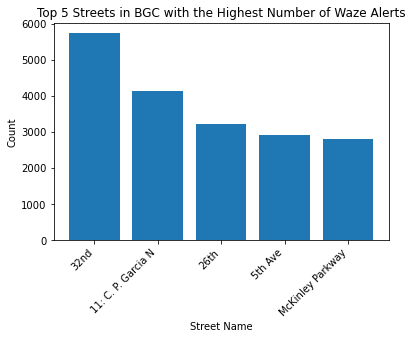

In [401]:
# Get the top 5 streets with the highest number of Waze alerts
street_counts = df['Street'].value_counts().head(5)

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(street_counts.index, street_counts.values)

# Set the chart title, x-label, and y-label
ax.set_title('Top 5 Streets in BGC with the Highest Number of Waze Alerts')
ax.set_xlabel('Street Name')
ax.set_ylabel('Count')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

In [374]:
df['Type'].value_counts()

JAM              37243
WEATHERHAZARD     3787
ACCIDENT          1535
ROAD_CLOSED        172
Name: Type, dtype: int64

In [375]:
#Label List of Waze Alert Types
type_list = df['Type'].unique().tolist()

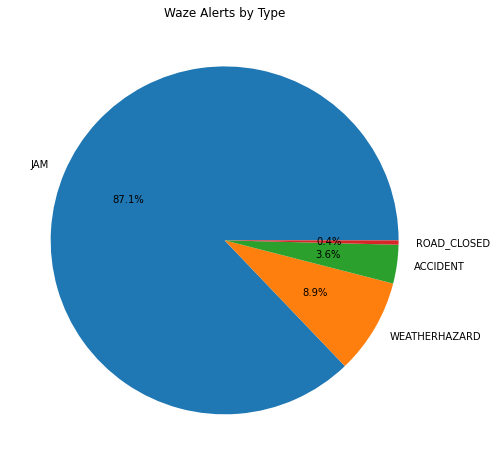

In [376]:
#Pie chart - Waze Alerts By Type
fig, ax = plt.subplots(figsize=(8, 8))

# plot the pie chart
ax.pie(df['Type'].value_counts(), labels=type_list, autopct='%1.1f%%')

# set the title
ax.set_title('Waze Alerts by Type')

# show the plot
plt.show()


In [377]:
df['Subtype'].value_counts()

JAM_HEAVY_TRAFFIC                     17803
JAM_STAND_STILL_TRAFFIC               13891
JAM_MODERATE_TRAFFIC                   3864
                                       2107
HAZARD_ON_ROAD_CONSTRUCTION            1338
HAZARD_ON_ROAD_CAR_STOPPED             1159
ACCIDENT_MINOR                          996
HAZARD_ON_SHOULDER_CAR_STOPPED          395
ACCIDENT_MAJOR                          346
HAZARD_ON_ROAD_OBJECT                   188
HAZARD_ON_SHOULDER_ANIMALS              126
HAZARD_WEATHER_FLOOD                     95
HAZARD_ON_SHOULDER_MISSING_SIGN          88
ROAD_CLOSED_CONSTRUCTION                 87
HAZARD_ON_ROAD_ROAD_KILL                 57
ROAD_CLOSED_EVENT                        54
HAZARD_ON_ROAD_ICE                       49
HAZARD_ON_ROAD_POT_HOLE                  27
HAZARD_WEATHER                           23
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT       18
HAZARD_WEATHER_FOG                       15
HAZARD_WEATHER_HAIL                       7
ROAD_CLOSED_HAZARD              

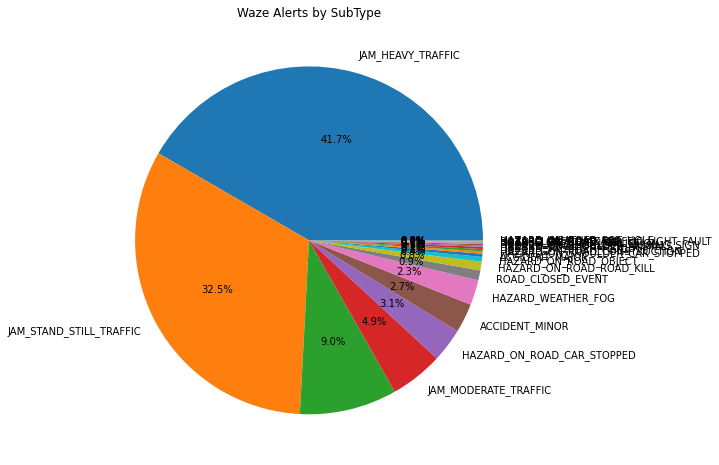

In [378]:
#Label List of Waze Alert SubTypes
subType_list = df['Subtype'].unique().tolist()

#Pie chart - Waze Alerts By SubType
fig, ax = plt.subplots(figsize=(8, 8))

# plot the pie chart
ax.pie(df['Subtype'].value_counts(), labels=subType_list, autopct='%1.1f%%')

# set the title
ax.set_title('Waze Alerts by SubType')

# show the plot
plt.show()


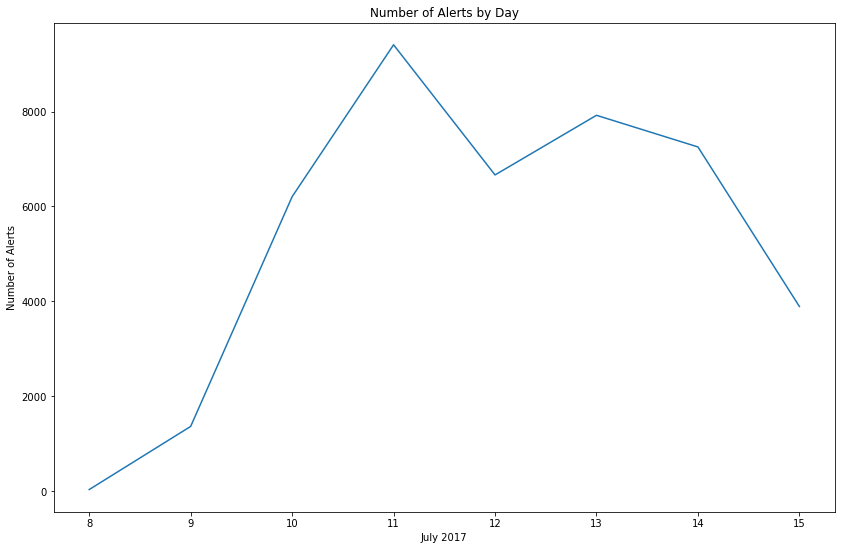

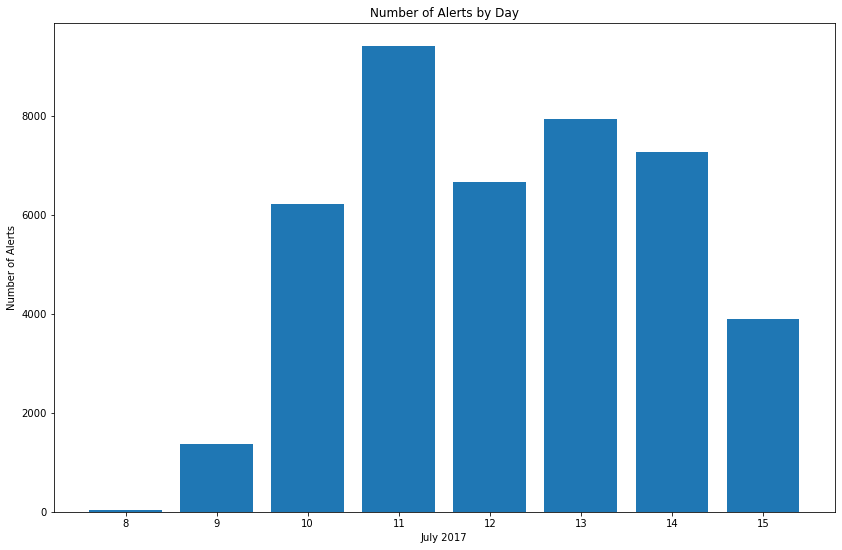

In [385]:
# create a new Day column
df['Day'] = df.index.day

# group data by Hour and count the number of alerts in each hour
hourly_counts = df.groupby('Day')['Type'].count()

# plot the data using a line chart
plt.figure(figsize=(14,9))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title('Number of Alerts by Day')
plt.xlabel('July 2017')
plt.ylabel('Number of Alerts')
plt.show()

# plot the data using a bar chart
plt.figure(figsize=(14,9))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.title('Number of Alerts by Day')
plt.xlabel('July 2017')
plt.ylabel('Number of Alerts')
plt.show()

#July 8, 2017	 Saturday
#July 9, 2017	 Sunday
#July 10, 2017	 Monday
#July 11, 2017	 Tuesday
#July 12, 2017	 Wednesday
#July 13, 2017	 Thursday
#July 14, 2017	 Friday
#July 15, 2017	 Saturday

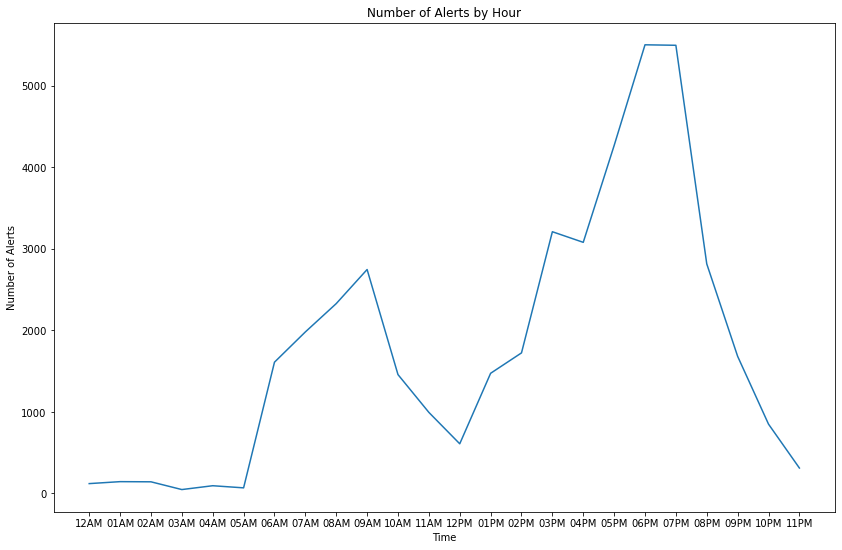

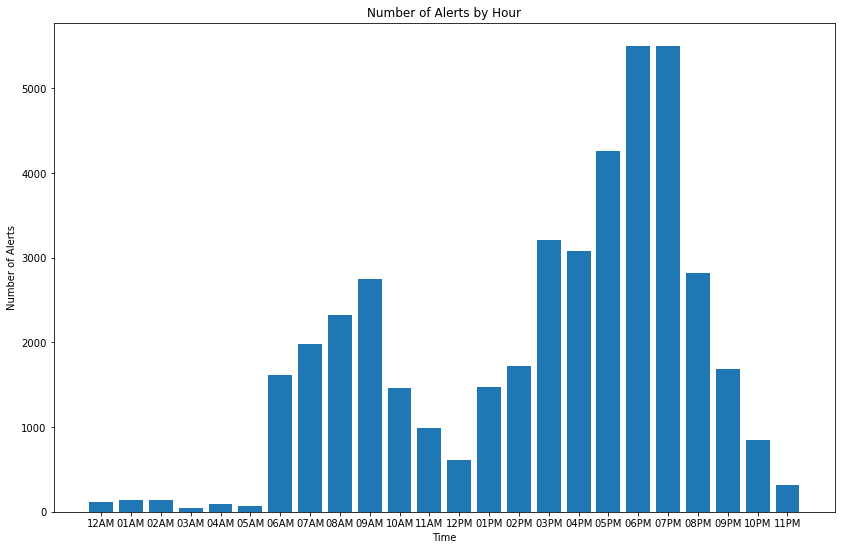

In [380]:
# create a new Hour column
df['Hour'] = df.index.hour

# group data by Hour and count the number of alerts in each hour
hourly_counts = df.groupby('Hour')['Type'].count()

# create a list of datetime objects for each hour of the day
hour_labels = [datetime.time(hour=h).strftime('%I%p') for h in range(24)]

# plot the data using a line chart
plt.figure(figsize=(14,9))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title('Number of Alerts by Hour')
plt.xlabel('Time')
plt.ylabel('Number of Alerts')
plt.xticks(hourly_counts.index, hour_labels)
plt.show()

# plot the data using a bar chart
plt.figure(figsize=(14,9))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.title('Number of Alerts by Hour')
plt.xlabel('Time')
plt.ylabel('Number of Alerts')
plt.xticks(hourly_counts.index, hour_labels)
plt.show()

In [400]:
# Create a map centered at the mean of the data points
map = folium.Map(location=[df['Long'].mean(), df['Lat'].mean()], zoom_start=15.5)

# Create a HeatMap layer using the data points
heatmap_data = [[row['Long'], row['Lat']] for index, row in df.iterrows()]
heatmap_layer = HeatMap(heatmap_data)

# Add the HeatMap layer to the map
heatmap_layer.add_to(map)

# Display the map
map

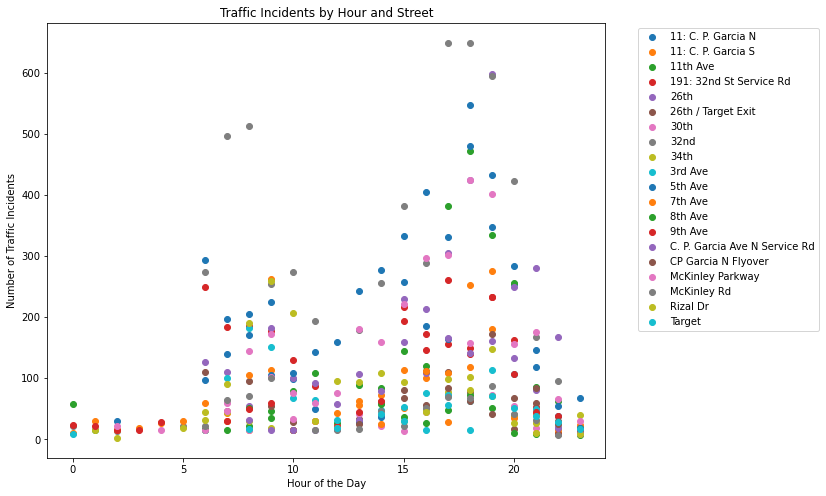

In [395]:
# get the top 20 streets by number of incidents
top_20_streets = df['Street'].value_counts().head(20).index.tolist()

# filter the dataframe to only include incidents from the top 10 streets
df_top_20 = df[df['Street'].isin(top_20_streets)]

# group data by street and hour and count the number of incidents in each hour
hourly_counts = df_top_20.groupby(['Street', df_top_20.index.hour])['Type'].count()

# create a scatterplot with the number of traffic incidents on the x-axis and hour of the day on the y-axis, using the street name as the data point labels
fig, ax = plt.subplots(figsize=(10, 8))
for street in hourly_counts.index.levels[0]:
    x = hourly_counts[street].index.values
    y = hourly_counts[street].values
    ax.scatter(x, y, label=street)

# set the axis labels and title
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Traffic Incidents')
ax.set_title('Traffic Incidents by Hour and Street')

# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# show the plot
plt.show()

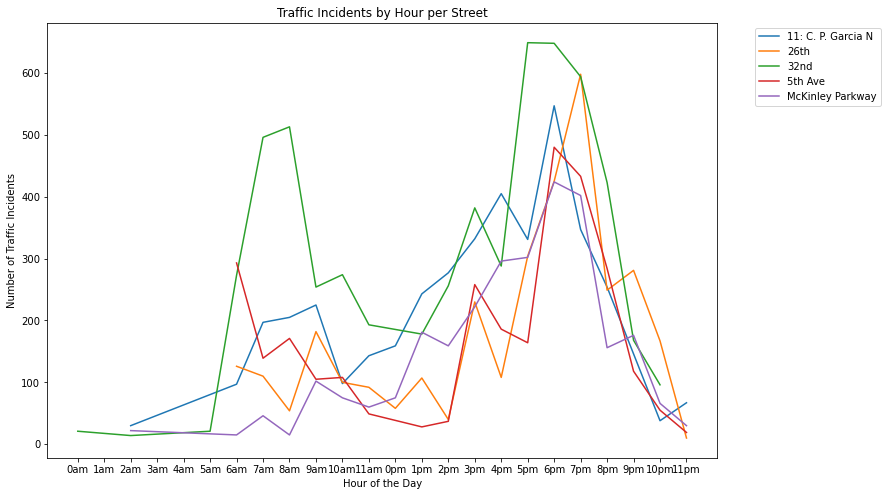

In [402]:
# get the top 5 streets by number of incidents
top_5_streets = df['Street'].value_counts().head(5).index.tolist()

# filter the dataframe to only include incidents from the top 5 streets
df_top_5 = df[df['Street'].isin(top_5_streets)]

# group data by street and hour and count the number of incidents in each hour
hourly_counts = df_top_5.groupby(['Street', df_top_5.index.hour])['Type'].count()

# create a line graph with the number of traffic incidents on the y-axis and hour of the day on the x-axis, using the street name as the data point labels
fig, ax = plt.subplots(figsize=(12, 8))
for street in hourly_counts.index.levels[0]:
    x = hourly_counts[street].index.values
    y = hourly_counts[street].values
    ax.plot(x, y, label=street)

# format the x-axis labels to display hours in the format "1pm", "2pm", etc.
ax.set_xticks(range(24))
ax.set_xticklabels([f"{hour%12}{'pm' if hour>=12 else 'am'}" for hour in range(24)])

# set the axis labels and title
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Traffic Incidents')
ax.set_title('Traffic Incidents by Hour per Street')

# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# show the plot
plt.show()